# Reconstrucción de señal a partir del espectro

En el archivo clases/tp2/fft_hjs.npy se almacenaron los valores de un espectro en frecuencia correspondientes a una señal desconocida.

Preparación del entorno (_imports_) y definición de funciones.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Número de muestras y datos básicos del vector.

In [2]:
samples = np.load('../data/fft_hjs.npy')
N = samples.size
print(f'N = {N}')
print(f'Máximo = {samples.max()}')
print(f'Mínimo = {samples.min()}')

N = 1000
Máximo = (208.7905255937184-158.4315584976771j)
Mínimo = (-262.33165968421537-240.58342321685288j)


## Puede estimar que representa esta señal? 

***tip***: Grafique en 2D la idft.


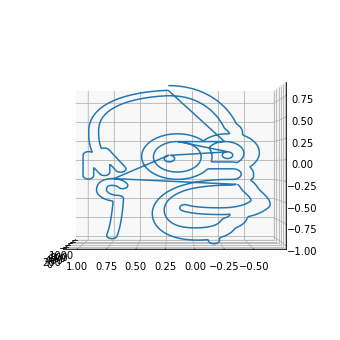

In [3]:
from mpl_toolkits.mplot3d import axes3d

ifft = np.fft.ifft(samples)
x = np.linspace(0, N, N, endpoint=False)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, np.imag(ifft), np.real(ifft))
ax.view_init(azim=180, elev=0)
plt.show()


## Hasta que punto podría limitar el ancho de banda del espectro dado en el archivo y que aun se logre interpretar la señal?

En las siguientes imágenes se observa que hay información en todas las frecuencias. Con anular una frecuencia, ya se torna dificil identificar la figura formada por la señal.


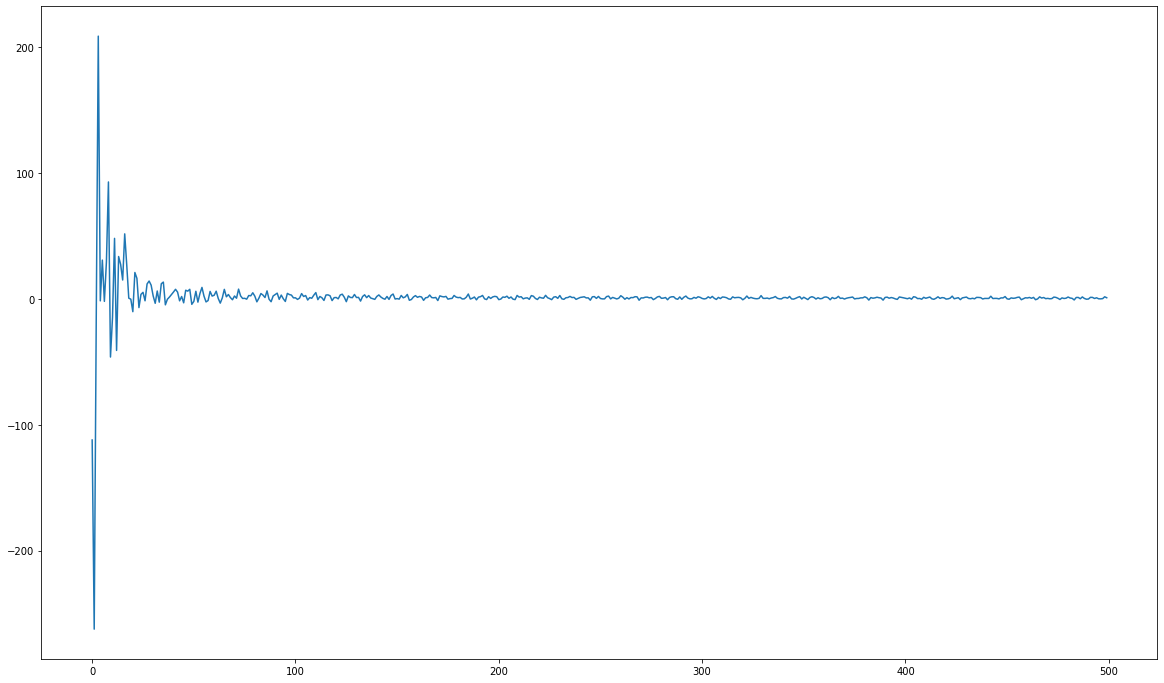

In [4]:
plt.figure(figsize=(20, 12))
plt.plot(x[:500], np.real(samples)[:500])

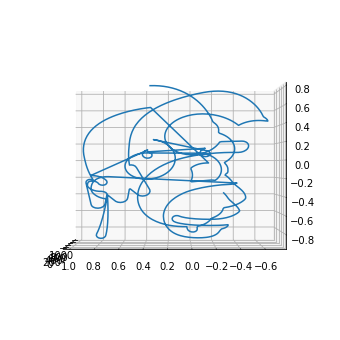

In [5]:
mask_ones = np.ones((N,))
mask_zeros = np.zeros((N-998,))
mask_ones[998:] = mask_zeros
new_samples = samples * mask_ones
ifft = np.fft.ifft(new_samples)
x = np.linspace(0, N, N, endpoint=False)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, np.imag(ifft), np.real(ifft))
ax.view_init(azim=180, elev=0)
plt.show()